# Ex18. ÌîÑÎ°úÏ†ùÌä∏ : Îã§ÏñëÌïú OCRÎ™®Îç∏ ÎπÑÍµêÌïòÍ∏∞

## ‚≠êÔ∏è Í∏∞ÌöçÌïú ÏÑúÎπÑÏä§

----------------------------
* ÏÑúÎπÑÏä§Î™Ö : Îã§ Ïû°ÏïÑ!!
* ÏÑúÎπÑÏä§ ÏÑ§Î™Ö
   - Ï†úÌíà ÎùºÎ≤®Ïóê ÏûàÎäî ÌÖçÏä§Ìä∏Î•º Ïù∏ÏãùÌïòÏó¨ ÌíàÏßàÏùÑ Í≤ÄÏÇ¨ÌïòÍ∏∞
   - Ìè¨Ïû•Ïù¥ ÏùºÏπòÌïòÎäîÏßÄ, ÏûòÎ™ª Ïù∏ÏáÑÎêòÏñ¥ ÏûàÏßÄ ÏïäÏùÄÏßÄ Îì±Îì±
* Î™®Îç∏ ÌèâÍ∞Ä Í∏∞Ï§Ä
    - Ïñ¥Îë°Í±∞ÎÇò ÎàÑÏõåÏûàÍ±∞ÎÇò Ìï¥ÎèÑ Ïûò Ïù∏ÏãùÌïòÎäîÍ∞Ä?

## ‚úÖ Î™©Ï∞®

---------------------

### ‚ñ∂Ô∏è Step1. Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
### ‚ñ∂Ô∏è Step2. Google OCR API, keras-ocr, TesseractÎ°ú ÌÖåÏä§Ìä∏ ÏßÑÌñâ
### ‚ñ∂Ô∏è Step3. ÌÖåÏä§Ìä∏ Í≤∞Í≥º Ï†ïÎ¶¨
### ‚ñ∂Ô∏è Step4. Í≤∞Í≥º Î∂ÑÏÑùÍ≥º Í≤∞Î°† Ï†úÏãú

--------------------------

## Step1. Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
from google.cloud import vision
import io

In [2]:
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/product'
file_list = os.listdir(img_dir)
file_list

['image1.jpg',
 'image6.jpg',
 'image2.jpg',
 'image5.jpg',
 'image10.jpg',
 'image4.jpg',
 'image3.jpg',
 'image9.jpg',
 'image8.jpg',
 'image7.jpg']

## Step2. Google OCR API, keras-ocr, TesseractÎ°ú ÌÖåÏä§Ìä∏ ÏßÑÌñâ

### 1) Google OCR API

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:
# Îã§Ïö¥Î∞õÏùÄ Ïù∏Ï¶ùÌÇ§ Í≤ΩÎ°úÍ∞Ä Ï†ïÌôïÌïòÍ≤å ÏßÄÏ†ïÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§. 
#!ls -l $GOOGLE_APPLICATION_CREDENTIALS
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# ÏúÑÏóêÏÑú Ï†ïÏùòÌïú OCR API Ïù¥Ïö© Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï¥ Î¥ÖÏãúÎã§.
for file in file_list:
    print(f'[{file}]')
    detect_text(os.path.join(img_dir, file))
    print()

[image1.jpg]
Texts:

"FABERLIC
Bioglow
My way to
use less
makeup
–ö—Ä–µ–º
—Å –∂–µ–º—á—É–∂–Ω—ã–º
—ç—Ñ—Ñ–µ–∫—Ç–æ–º
Illuminating
face cream
30 M/ml
FABERLIC
Bioglow
You're my
sunshine
–°—ã–≤–æ—Ä–æ—Ç–∫–∞
–¥–ª—è –ª–∏—Ü–∞
Serum
"

"FABERLIC"

"Bioglow"

"My"

"way"

"to"

"use"

"less"

"makeup"

"–ö—Ä–µ–º"

"—Å"

"–∂–µ–º—á—É–∂–Ω—ã–º"

"—ç—Ñ—Ñ–µ–∫—Ç–æ–º"

"Illuminating"

"face"

"cream"

"30"

"M/ml"

"FABERLIC"

"Bioglow"

"You're"

"my"

"sunshine"

"–°—ã–≤–æ—Ä–æ—Ç–∫–∞"

"–¥–ª—è"

"–ª–∏—Ü–∞"

"Serum"
bounds: (1156,4271),(1245,4312),(1229,4346),(1140,4305)

[image6.jpg]
Texts:

"sin d'un lavage de mains efficace. Ce produit est enrichi en extrais dO
Bel Lavant R√©surrection Aromatique pour les Mains
lendarin Rind Rosemary Leaf ‚Ä¢ Cedar Atlas
esurrection Aromatique Hand Wash
Orange, Rosemary and Lavender.
sperior cleansing gel for hard-working hands. Use whenever and itern
auire effective hand washing. This product is enhanced with botansa
aarant exceptionnel pour mains malmen√©es. A utilis

### 2) keras-ocr

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocrÏù¥ detectorÍ≥º recognizerÎ•º ÏúÑÌïú Î™®Îç∏ÏùÑ ÏûêÎèôÏúºÎ°ú Îã§Ïö¥Î°úÎìúÎ∞õÍ≤å Îê©ÎãàÎã§. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


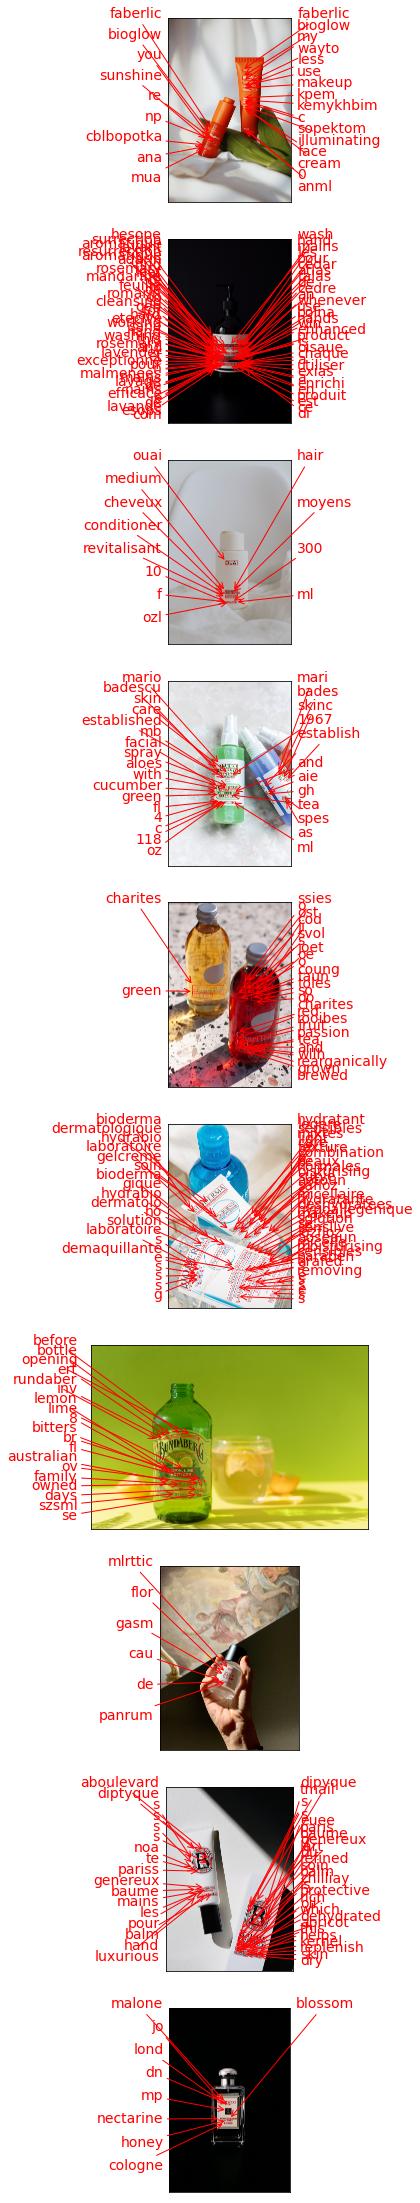

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 3) Tesseract

In [9]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # ÌïúÍµ≠Ïñ¥ÎùºÎ©¥ lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # ÌïúÍµ≠Ïñ¥ÎùºÎ©¥ lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [10]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract_cropped'

for file in file_list:
    print(f'[{file}]')
    try:
        recognize_images(os.path.join(img_dir, file), save_dir)
    except:
        print(f'Cannot recognize characters from {file}')

[image1.jpg]

c.


FABERLIC

‚Äî_


MY


a5

use



Pe Ce

a

eta ats

face cream

4


Done
[image6.jpg]

-


4

]

re

Ferd

‚ÄúUTECtiOn

Aroma

tig

t=


ue

pour les

avant

Resurrection

Aromatiq

i

-aVan


oe

edar

A

arin

Rind

.

Rosemary

Leaf


C

A de

Mandarin

de

‚Äòme

C√©dre

:

pay

(>

¬©

Feuille

de

alll

Ghicmis

tel

.

nanas

- *

181%

Te

gel for

gage dtd

is enn

aw rs

and

Was

hing.

aT

and

Lavender

A utiliser

~

nees.

=

‚Äúptionne:

Your

mains

iT}

Co Ba

est

_

Ue

de

Mains

efficace.

=") @

Ue

-aVande.

=

Done
[image2.jpg]

Done
[image5.jpg]
SKIN

CARE

Fstablished

1967

‚ÄòACIAL

SPRAY

WITH

ALOE.

UCUMBER

AND


GREEN

TEA

\y


Done
[image10.jpg]
|

Done
[image4.jpg]

Done
[image3.jpg]

:

ws i

i

(py


Ie

%

,

tig


LEMON

mm)

‚Äî . :

Done
[image9.jpg]

Done
[image8.jpg]

Done
[image7.jpg]
JO

VIAL

## Step3. ÌÖåÏä§Ìä∏ Í≤∞Í≥º Ï†ïÎ¶¨

In [16]:
def compare_ocr(file):
    
    print('\n[Google OCR]')
    detect_text(os.path.join(img_dir, file))
    print('-------------------------------------------')
    
    print('[keras-ocr]')
    idx = file_list.index(file)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('-------------------------------------------')
    
    print('\n[Tesseract]')
    recognize_images(os.path.join(img_dir, file), save_dir)

### 1) Í∑∏Î¶ºÏûê ÏßÑ Ï†úÌíà


[Google OCR]
Texts:

"sin d'un lavage de mains efficace. Ce produit est enrichi en extrais dO
Bel Lavant R√©surrection Aromatique pour les Mains
lendarin Rind Rosemary Leaf ‚Ä¢ Cedar Atlas
esurrection Aromatique Hand Wash
Orange, Rosemary and Lavender.
sperior cleansing gel for hard-working hands. Use whenever and itern
auire effective hand washing. This product is enhanced with botansa
aarant exceptionnel pour mains malmen√©es. A utiliser √† chaque fois que
rce de Mandarine ‚Ä¢ Feuille de Romarin ‚Ä¢ C√®dre de l'Atlas
Aesop.
les Mains
ange, Rosemary and Lavender.
marin et de Lavande.
16,9
3esop.com
"

"sin"

"d'un"

"lavage"

"de"

"mains"

"efficace."

"Ce"

"produit"

"est"

"enrichi"

"en"

"extrais"

"dO"

"Bel"

"Lavant"

"R√©surrection"

"Aromatique"

"pour"

"les"

"Mains"

"lendarin"

"Rind"

"Rosemary"

"Leaf"

"‚Ä¢"

"Cedar"

"Atlas"

"esurrection"

"Aromatique"

"Hand"

"Wash"

"Orange,"

"Rosemary"

"and"

"Lavender."

"sperior"

"cleansing"

"gel"

"for"

"hard-working"


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


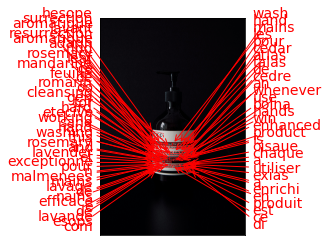

-------------------------------------------

[Tesseract]

-


4

]

re

Ferd

‚ÄúUTECtiOn

Aroma

tig

t=


ue

pour les

avant

Resurrection

Aromatiq

i

-aVan


oe

edar

A

arin

Rind

.

Rosemary

Leaf


C

A de

Mandarin

de

‚Äòme

C√©dre

:

pay

(>

¬©

Feuille

de

alll

Ghicmis

tel

.

nanas

- *

181%

Te

gel for

gage dtd

is enn

aw rs

and

Was

hing.

aT

and

Lavender

A utiliser

~

nees.

=

‚Äúptionne:

Your

mains

iT}

Co Ba

est

_

Ue

de

Mains

efficace.

=") @

Ue

-aVande.

=

Done


In [17]:
compare_ocr('image6.jpg')


[Google OCR]
Texts:

"HERETIC
FLOR
GASM
EAU DE PARFUM
"

"HERETIC"

"FLOR"

"GASM"

"EAU"

"DE"

"PARFUM"
bounds: (1443,2550),(1550,2594),(1541,2616),(1434,2572)
-------------------------------------------
[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


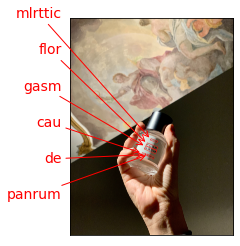

-------------------------------------------

[Tesseract]

Done


In [18]:
compare_ocr('image9.jpg')


[Google OCR]
Texts:

"Rooibos tea with passion
fruit, organically grown
and real brewed
ChariTea
red
ChariTe
green
bed
"

"Rooibos"

"tea"

"with"

"passion"

"fruit,"

"organically"

"grown"

"and"

"real"

"brewed"

"ChariTea"

"red"

"ChariTe"

"green"

"bed"
bounds: (731,2319),(821,2335),(812,2381),(723,2364)
-------------------------------------------
[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


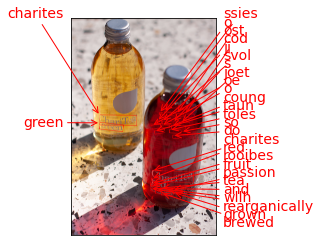

-------------------------------------------

[Tesseract]
|

Done


In [19]:
compare_ocr('image10.jpg')


[Google OCR]
Texts:

"INVERT BOTTLE BEFORE OPENING
\DABI
BER
LEMON, LIME
& BITTERS
BREW
AUSTRALIAN
FAMILY OWNED
OVE
7.
DAYS
AFT
INERGY
DI
ENE
375ML
CRAF
"

"INVERT"

"BOTTLE"

"BEFORE"

"OPENING"

"\DABI"

"BER"

"LEMON,"

"LIME"

"&"

"BITTERS"

"BREW"

"AUSTRALIAN"

"FAMILY"

"OWNED"

"OVE"

"7."

"DAYS"

"AFT"

"INERGY"

"DI"

"ENE"

"375ML"

"CRAF"
bounds: (2044,2847),(2175,2698),(2229,2745),(2098,2895)
-------------------------------------------
[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


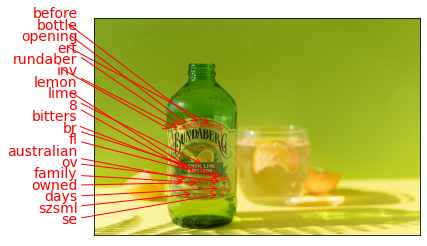

-------------------------------------------

[Tesseract]

:

ws i

i

(py


Ie

%

,

tig


LEMON

mm)

‚Äî . :

Done


In [20]:
compare_ocr('image3.jpg')


[Google OCR]
Texts:

"OUAI
MEDIUM HAIR
CHEVEUX MOYENS
CONDITIONER
REVITALISANT
10 fl oz /300 ml
OZ
"

"OUAI"

"MEDIUM"

"HAIR"

"CHEVEUX"

"MOYENS"

"CONDITIONER"

"REVITALISANT"

"10"

"fl"

"oz"

"/300"

"ml"

"OZ"
bounds: (1284,2989),(1316,2989),(1316,3005),(1284,3005)
-------------------------------------------
[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


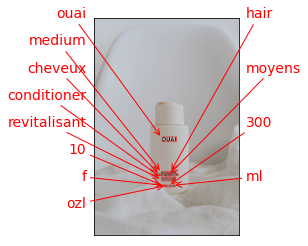

-------------------------------------------

[Tesseract]

Done


In [21]:
compare_ocr('image2.jpg')

### 2) ÏòÜÏúºÎ°ú ÎàÑÏõåÏûàÎäî Ï†úÌíà


[Google OCR]
Texts:

"BIODERMA
LABORATOIRE DERMATOLOGIQUE
Hydrabio
Gel-Cr√®me
Oin hydratant
fexture l√©g√®re
Sisturising care
Visage & Yeux
Face & Eyes
Hydrabio
ERA
Solution micellaire
d√©maquillante hydratante
Peaux sensibles d√©shydrat√©es
Hypoallerg√©nique
Light
Sans rin√ßage - Sans
paraben
AQUAGENIUM"
Moisturising make-up
removing micelle solution
free-Hypoallerg
Brevet/Patent AQUAGENIUM
500ml E 16.7 FL.OZ.
"

"BIODERMA"

"LABORATOIRE"

"DERMATOLOGIQUE"

"Hydrabio"

"Gel-Cr√®me"

"Oin"

"hydratant"

"fexture"

"l√©g√®re"

"Sisturising"

"care"

"Visage"

"&"

"Yeux"

"Face"

"&"

"Eyes"

"Hydrabio"

"ERA"

"Solution"

"micellaire"

"d√©maquillante"

"hydratante"

"Peaux"

"sensibles"

"d√©shydrat√©es"

"Hypoallerg√©nique"

"Light"

"Sans"

"rin√ßage"

"-"

"Sans"

"paraben"

"AQUAGENIUM""

"Moisturising"

"make-up"

"removing"

"micelle"

"solution"

"free-Hypoallerg"

"Brevet/Patent"

"AQUAGENIUM"

"500ml"

"E"

"16.7"

"FL.OZ."
bounds: (3646,4853),(3767,4571),(3885,4622),(3764,4

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


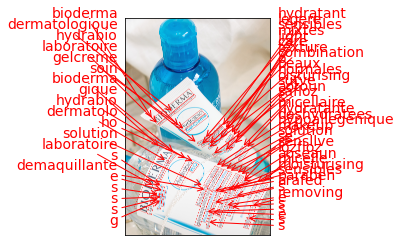

-------------------------------------------

[Tesseract]

Done


In [22]:
compare_ocr('image4.jpg')

### 3) ÏÇ¥Ïßù Í∏∞Ïö∏Ïñ¥ÏßÄÍ±∞ÎÇò Ïûò ÏïàÎ≥¥Ïù¥Îäî Ï†úÌíà


[Google OCR]
Texts:

"FABERLIC
Bioglow
My way to
use less
makeup
–ö—Ä–µ–º
—Å –∂–µ–º—á—É–∂–Ω—ã–º
—ç—Ñ—Ñ–µ–∫—Ç–æ–º
Illuminating
face cream
30 M/ml
FABERLIC
Bioglow
You're my
sunshine
–°—ã–≤–æ—Ä–æ—Ç–∫–∞
–¥–ª—è –ª–∏—Ü–∞
Serum
"

"FABERLIC"

"Bioglow"

"My"

"way"

"to"

"use"

"less"

"makeup"

"–ö—Ä–µ–º"

"—Å"

"–∂–µ–º—á—É–∂–Ω—ã–º"

"—ç—Ñ—Ñ–µ–∫—Ç–æ–º"

"Illuminating"

"face"

"cream"

"30"

"M/ml"

"FABERLIC"

"Bioglow"

"You're"

"my"

"sunshine"

"–°—ã–≤–æ—Ä–æ—Ç–∫–∞"

"–¥–ª—è"

"–ª–∏—Ü–∞"

"Serum"
bounds: (1156,4271),(1245,4312),(1229,4346),(1140,4305)
-------------------------------------------
[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


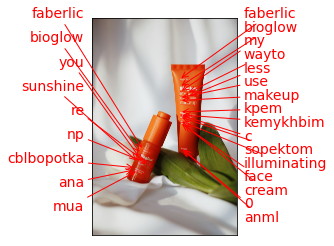

-------------------------------------------

[Tesseract]

c.


FABERLIC

‚Äî_


MY


a5

use



Pe Ce

a

eta ats

face cream

4


Done


In [25]:
compare_ocr('image1.jpg')


[Google OCR]
Texts:

"diptyque
34
paris
Baume G√©n√©reux
–í–∞–∏—Ç–µ
pour les Mains
Luxurious Hand Balm
dipyque
paris
SUd 34
BAUME
G√âN√âREUX
L'ART DU SOIN
Refined, silky, protective. This
balm is rich in Apricot Kernel
Oil, which helps replenish dry,
dehydrated skin.
346
Aboulevard
saint germa
34boulc
boulevard saint
"

"diptyque"

"34"

"paris"

"Baume"

"G√©n√©reux"

"–í–∞–∏—Ç–µ"

"pour"

"les"

"Mains"

"Luxurious"

"Hand"

"Balm"

"dipyque"

"paris"

"SUd"

"34"

"BAUME"

"G√âN√âREUX"

"L'ART"

"DU"

"SOIN"

"Refined,"

"silky,"

"protective."

"This"

"balm"

"is"

"rich"

"in"

"Apricot"

"Kernel"

"Oil,"

"which"

"helps"

"replenish"

"dry,"

"dehydrated"

"skin."

"346"

"Aboulevard"

"saint"

"germa"

"34boulc"

"boulevard"

"saint"
bounds: (665,1913),(635,1819),(693,1800),(723,1894)
-------------------------------------------
[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


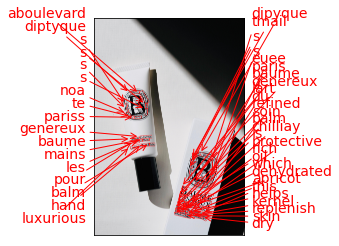

-------------------------------------------

[Tesseract]

Done


In [26]:
compare_ocr('image8.jpg')

### 4) Ï†ïÎ©¥ÏúºÎ°ú Ïûò Î≥¥Ïù¥Îäî Ï†úÌíà


[Google OCR]
Texts:

"MARIO
BADESCU
SKIN CARE
Established 1967
MB
MARI
BADES
FACIAL SPRAY
WITH ALOE,
CUCUMBER AND
SKINCA
Establishe
GREEN TE A
4 fl oz e (118 ml)
SKIN
TYPES
ALL
E Áï´Âü∫Êâã0ÂõΩ
"

"MARIO"

"BADESCU"

"SKIN"

"CARE"

"Established"

"1967"

"MB"

"MARI"

"BADES"

"FACIAL"

"SPRAY"

"WITH"

"ALOE,"

"CUCUMBER"

"AND"

"SKINCA"

"Establishe"

"GREEN"

"TE"

"A"

"4"

"fl"

"oz"

"e"

"(118"

"ml)"

"SKIN"

"TYPES"

"ALL"

"E"

"Áï´"

"Âü∫"

"Êâã"

"0"

"ÂõΩ"
bounds: (3157,3589),(3177,3620),(3114,3662),(3093,3631)
-------------------------------------------
[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


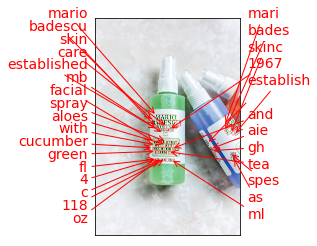

-------------------------------------------

[Tesseract]
SKIN

CARE

Fstablished

1967

‚ÄòACIAL

SPRAY

WITH

ALOE.

UCUMBER

AND


GREEN

TEA

\y


Done


In [24]:
compare_ocr('image5.jpg')


[Google OCR]
Texts:

"Jo MAL ONE
LONDON
NECTARINE BLOSSOM
& HONEY
COLOGNE
"

"Jo"

"MAL"

"ONE"

"LONDON"

"NECTARINE"

"BLOSSOM"

"&"

"HONEY"

"COLOGNE"
bounds: (1546,3228),(1763,3230),(1763,3261),(1546,3259)
-------------------------------------------
[keras-ocr]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


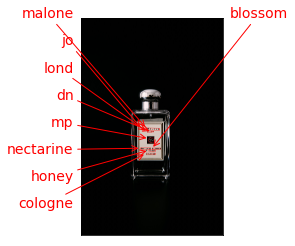

-------------------------------------------

[Tesseract]
JO

VIALONE

| OND ON

NECTARINE

rM1LOSSOM

Ex

MONE Y

( OLOGNE


Done


In [23]:
compare_ocr('image7.jpg')

## Step4. Í≤∞Í≥º Î∂ÑÏÑùÍ≥º Í≤∞Î°† Ï†úÏãú

#### ‚úÖ Google OCR API
    - image9.jpgÎ•º Î≥¥Î©¥ keras-ocrÏùÄ 'HERETIC'ÏùÑ 'mlrttic'Ïù¥ÎùºÍ≥† Ïù∏ÏãùÌïú Í≤ÉÏùÑ google ocrÏùÄ Ï†úÎåÄÎ°ú 'HERETIC'Ïù¥ÎùºÍ≥† Ïù∏ÏãùÌïú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎäîÎç∞ Í∑∏Î¶ºÏûêÍ∞Ä Ï†∏ÏÑú Ïñ¥Îë°Í≤å Î≥¥Ïó¨ÎèÑ Ïûò Ïù∏ÏãùÌïúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÎã§.
    - ÏïÑÎßà Ïì∞Í≤å ÎêúÎã§Î©¥ Ïù¥Í≤ÉÏùÑ Ïì∞ÏßÄ ÏïäÏùÑÍπå Ïã∂Îã§.
#### ‚úÖ keras-ocr
    - ÎåÄÎ∂ÄÎ∂Ñ Ï†úÌíà Í∏ÄÏûêÎì§ÏùÑ Ïûò Ïù∏ÏãùÌïòÎäî Ìé∏Ïù∏ Í≤É Í∞ôÎã§.
#### ‚úÖ Tesseract
    - Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï†úÎåÄÎ°ú Ïûò Ïù∏ÏãùÌïòÏßÄ Î™ªÌïú Í≤É Í∞ôÎã§.
    - ÌäπÌûàÎÇò ÏÇ¥Ïßù Ïñ¥Îë°Í±∞ÎÇò Í∑∏Î¶ºÏûêÍ∞Ä ÏßÄÎ©¥ Ï†úÎåÄÎ°ú Ïù∏ÏãùÏùÑ Î™ªÌïòÎäî Í≤É Í∞ôÎã§.

# üåü Î£®Î∏åÎ¶≠

|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Í∏∞Ï§Ä|
|:----------|:-----------|
|1. OCRÏùÑ ÌôúÏö©ÌïòÏó¨ Íµ¨ÌòÑÌïòÎ†§Îäî ÏÑúÎπÑÏä§Ïùò Í∏∞ÌöçÏù¥ ÌÉÄÎãπÌïúÍ∞Ä?|Î™©ÌëúÎ°ú ÌïòÎäî ÏÑúÎπÑÏä§Í∞Ä OCRÎ•º Ï†ÅÏö© Í∞ÄÎä•ÌïòÎ©∞, OCRÏùÑ ÌôúÏö©ÌñàÏùÑ Îïå ÎçîÏö± Ïú†Ïö©Ìï¥ÏßÑÎã§.|
|2. Î™®Îç∏ ÌèâÍ∞ÄÍ∏∞Ï§ÄÏù¥ Î™ÖÌôïÌïòÍ≥† Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏÑ∏ÏõåÏ°åÎäîÍ∞Ä?|ÌèâÍ∞Ä Í∏∞Ï§ÄÏóê Î∂ÄÌï©ÌïòÎäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏßïÏù¥ Î¨¥ÏóáÏù∏ÏßÄ Î™ÖÌôïÌïòÍ≤å Ï†úÏãúÎêòÏóàÎã§.|
|3. ÌèâÍ∞ÄÍ∏∞Ï§ÄÏóê Îî∞Îùº Ï∂©Î∂ÑÌïú Î∂ÑÎüâÏùò ÌÖåÏä§Ìä∏Í∞Ä ÏßÑÌñâÎêòÍ≥† Í∑∏ Í≤∞Í≥ºÍ∞Ä Ïûò Ï†ïÎ¶¨ÎêòÏóàÎäîÍ∞Ä?|ÏµúÎåÄ 20Ïû•ÍπåÏßÄÏùò ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÎ•º ÏÇ¨Ïö©Ìï¥ Ï†úÏãúÎêú ÌèâÍ∞Ä Í∏∞Ï§ÄÏóê Îî∞Î•∏ ÌÖåÏä§Ìä∏ Í≤∞Í≥ºÍ∞Ä Ïûò Ï†ïÎ¶¨ÎêòÏñ¥ Í≤∞Î°†Ïù¥ ÎèÑÏ∂úÎêòÏóàÎã§.|

# üåü ÌöåÍ≥†

‚ñ∂Ô∏è Ïñ¥Î†§Ïõ†Îçò Ï†ê : TesseractÎ∂ÄÎ∂Ñ Ïã§ÌñâÌï† Îïå 'Cannot recognize characters from~'Í∞Ä ÎÇòÏò§Î©¥ÏÑú ÏïÑÎ¨¥Í≤ÉÎèÑ ÎÇòÏò®Í≤å ÏóÜÏóàÎäîÎç∞ Îã§Ïãú Ï∞®Í∑ºÏ∞®Í∑º Ïã§ÌñâÏãúÌÇ§Îã§ Î≥¥Îãà Ï†úÎåÄÎ°ú ÎÇòÏôîÎã§. Ïù¥ Ï†ê Ïô∏ÏóêÎäî ÌÅ¨Í≤å Ïñ¥Î†§Ïõ†Îçò Ï†êÏùÄ ÏóÜÏóàÎçò Í≤É Í∞ôÎã§.    

‚ñ∂Ô∏è Google OCR APIÎ•º Ïì∞Í∏∞ ÏúÑÌï¥ÏÑú ÌñàÎçò Í≥ºÏ†ïÎì§Ïù¥ Í∑ÄÏ∞ÆÏïòÏßÄÎßå Ïó¨Îü¨ OCRÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÎπÑÍµêÌï¥Í∞ÄÎäî Í≥ºÏ†ïÎì§Ïù¥ Ïû¨ÎØ∏ÏûàÏóàÎã§.

# üåü Ï∞∏Í≥†

[kec0130 github](https://github.com/kec0130/AIFFEL-project/blob/main/exploration/E18_ocr_pjt.ipynb)